# Лабораторная работа №2

*Соловьев Роман, Халилов Роман М32001*

## Вариант 5

Исследования проводятся на функции $f(x)=e^{sin(x)}*x^2$

Отрезок исследования выбран [-5.1, 2.45],
так как на нём соблюдается унимодальность функции. 
тогда фактический минимум на этом отрезке будет достигаться в точке 0

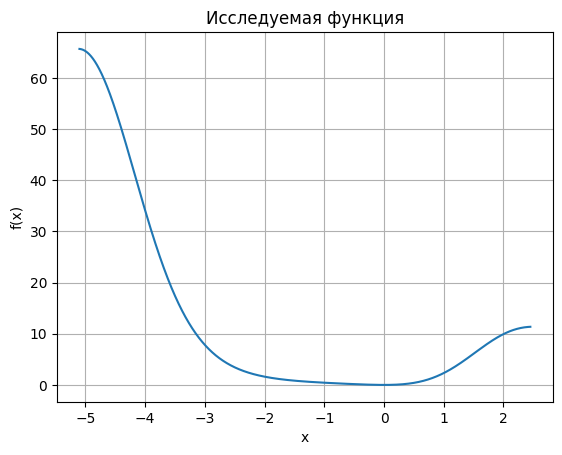

In [131]:
import matplotlib.pyplot as plt
import numpy as np

a = -5.1
b = 2.45

x = np.arange(a, b+0.0001, 0.0001)
function = np.exp(np.sin(x))*x**2

plt.grid()
plt.plot(x, function)
plt.title("Исследуемая функция")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

### Вспомогательные функции

In [132]:
import prettytable
from prettytable import PrettyTable

ind = [0, 1, 2, 3, 4]
h = [0.16, 0.08, 0.04, 0.02, 0.01]

def f_unimod(x):
    return np.exp(np.sin(x))*x**2

def find_fib_ind(l_eps):
    a = 0
    b = 1
    n = 0
    while a <= l_eps:
        a, b = b, a + b
        n += 1
    return n

def matrix_pow(x, n, I, mult):
    if n == 0:
        return I
    elif n == 1:
        return x
    else:
        y = matrix_pow(x, n // 2, I, mult)
        y = mult(y, y)
        if n % 2:
            y = mult(x, y)
        return y


def identity_matrix(n):
    r = list(range(n))
    return [[1 if i == j else 0 for i in r] for j in r]


def matrix_multiply(A, B):
    BT = list(zip(*B))
    return [[sum(a * b
                 for a, b in zip(row_a, col_b))
            for col_b in BT]
            for row_a in A]


def fib(n):
    F = matrix_pow([[1, 1], [1, 0]], n, identity_matrix(2), matrix_multiply)
    return F[0][1]

Все реализуемые функции будут принимать длину интервала, меньше которого должна быть длина возвращаемого интервала, содержащего минимум, а возвращать 7 чисел:
- Левую границу интервала
- Правую границу интервала
- Длину возвращаемого интервала
- Середину возвращаемого интервала
- Значение функции в середине возвращаемого интервала
- Количество итераций
- Количество вычислений функций

## Метод дихотомии

In [133]:
def dichotomy_method(eps, f):
    l = b - a
    d = eps/4
    a_i = a
    b_i = b
    iter_cnt = 0
    interval_dif = []
    interval_dif.append([a, b])

    while l >= eps:
        x1 = (a_i+b_i)/2 - d
        x2 = (a_i+b_i)/2 + d
        func_x1 = f(x1)
        func_x2 = f(x2)
        if func_x1 <= func_x2:
            b_i = x2
        if func_x1 >= func_x2:
            a_i = x1
        l = b_i - a_i
        iter_cnt += 1
        interval_dif.append([a_i, b_i])

    return [[a_i, b_i, l, (a_i+b_i)/2, f((a_i+b_i)/2), iter_cnt, 2*iter_cnt + 1], interval_dif]

In [134]:
dichotomy_method_table = PrettyTable(['a', 'b', 'l', 'x0', 'f(x0)', 'iter_cnt', 'func_calc_cnt'])
for i in h:
    dichotomy_method_table.add_row (dichotomy_method(i, f_unimod)[0])
print(dichotomy_method_table)

+-----------------------+-----------------------+------------------+------------------------+------------------------+----------+---------------+
|           a           |           b           |        l         |           x0           |         f(x0)          | iter_cnt | func_calc_cnt |
+-----------------------+-----------------------+------------------+------------------------+------------------------+----------+---------------+
|  -0.08109374999999974 |  0.05726562500000026  |   0.138359375    | -0.011914062499999743  | 0.00014026381883943016 |    7     |       15      |
| -0.024882812499999764 |  0.04445312500000023  |   0.0693359375   |  0.009785156250000234  | 9.669078838258447e-05  |    8     |       17      |
|  -0.01136718749999978 |  0.02333984375000022  |  0.03470703125   |  0.00598632812500022   | 3.605129332781175e-05  |    9     |       19      |
| -0.011972656249999696 |  0.005390625000000304 |  0.01736328125   | -0.003291015624999696  | 1.079519821791137e-05  |    10

In [135]:
dichotomy_method_table = PrettyTable(['h', 'l', 'iter_cnt', 'func_calc_cnt'])
for i in h:
    dichotomy_method_table.add_row ([i, dichotomy_method(i, f_unimod)[0][2], dichotomy_method(i, f_unimod)[0][5], dichotomy_method(i, f_unimod)[0][6]-1])
print(dichotomy_method_table)

+------+------------------+----------+---------------+
|  h   |        l         | iter_cnt | func_calc_cnt |
+------+------------------+----------+---------------+
| 0.16 |   0.138359375    |    7     |       14      |
| 0.08 |   0.0693359375   |    8     |       16      |
| 0.04 |  0.03470703125   |    9     |       18      |
| 0.02 |  0.01736328125   |    10    |       20      |
| 0.01 | 0.00868408203125 |    11    |       22      |
+------+------------------+----------+---------------+


In [136]:
for h_ind in h:
    dichotomy_method_table = PrettyTable(['iter', 'a_i', 'b_i'])
    index = 0
    for i in dichotomy_method(h_ind, f_unimod)[1]:
        dichotomy_method_table.add_row ([index, i[0], i[1]])
        index += 1
    print(dichotomy_method_table)

+------+----------------------+---------------------+
| iter |         a_i          |         b_i         |
+------+----------------------+---------------------+
|  0   |         -5.1         |         2.45        |
|  1   | -1.3649999999999998  |         2.45        |
|  2   | -1.3649999999999998  |  0.5825000000000002 |
|  3   | -0.43124999999999974 |  0.5825000000000002 |
|  4   | -0.43124999999999974 | 0.11562500000000026 |
|  5   | -0.19781249999999975 | 0.11562500000000026 |
|  6   | -0.08109374999999974 | 0.11562500000000026 |
|  7   | -0.08109374999999974 | 0.05726562500000026 |
+------+----------------------+---------------------+
+------+-----------------------+---------------------+
| iter |          a_i          |         b_i         |
+------+-----------------------+---------------------+
|  0   |          -5.1         |         2.45        |
|  1   |  -1.3449999999999998  |         2.45        |
|  2   |  -1.3449999999999998  |  0.5725000000000002 |
|  3   |  -0.406249999

## Метод золотого сечения

In [137]:
def golden_section_method(eps, f):
    l = b - a
    a_i = a
    b_i = b
    iter_cnt = 0
    F = (np.sqrt(5)+1)/2
    x1 = b - l/F
    x2 = a + l/F
    func_x1 = f(x1)
    func_x2 = f(x2)
    key = 0
    interval_dif = []
    interval_dif.append([a, b])

    while l >= eps:
        x1 = b_i - l/F
        x2 = a_i + l/F
        
        if key == 1:   
            func_x1 = f(x1)
        if key == 2:   
            func_x2 = f(x2)

        if func_x1 <= func_x2:
            b_i = x2
            func_x2 = func_x1
            key = 1
        if func_x1 > func_x2:
            a_i = x1
            func_x1 = func_x2
            key = 2

        l = b_i - a_i
        iter_cnt += 1
        interval_dif.append([a_i, b_i])

    return [[a_i, b_i, l, (a_i+b_i)/2, f((a_i+b_i)/2), iter_cnt, iter_cnt + 3], interval_dif]

In [138]:
golden_section_method_table = PrettyTable(['a', 'b', 'l', 'x0', 'f(x0)', 'iter_cnt', 'func_calc_cnt'])
for i in h:
    golden_section_method_table.add_row (golden_section_method(i, f_unimod)[0])
print(golden_section_method_table)

+----------------------+----------------------+----------------------+-----------------------+------------------------+----------+---------------+
|          a           |          b           |          l           |           x0          |         f(x0)          | iter_cnt | func_calc_cnt |
+----------------------+----------------------+----------------------+-----------------------+------------------------+----------+---------------+
| -0.07448247703810665 | 0.024842435059900858 |  0.0993249120980075  | -0.024820020989102895 | 0.0006009331987056654  |    9     |       12      |
| -0.0365437365462634  | 0.024842435059900858 | 0.06138617160616426  | -0.005850650743181272 | 3.403043152143839e-05  |    10    |       13      |
| -0.01309630543194238 | 0.024842435059900858 | 0.03793874049184324  |  0.005873064813979239 | 3.469606416420349e-05  |    11    |       14      |
| -0.00414018369514357 | 0.010351125682378642 | 0.014491309377522212 | 0.0031054709936175363 | 9.673945602249496e-06  

In [139]:
golden_section_method_table = PrettyTable(['h', 'l', 'iter_cnt', 'func_calc_cnt'])
for i in h:
    golden_section_method_table.add_row ([i, golden_section_method(i, f_unimod)[0][2], golden_section_method(i, f_unimod)[0][5], golden_section_method(i, f_unimod)[0][6]-1])
print(golden_section_method_table)

+------+----------------------+----------+---------------+
|  h   |          l           | iter_cnt | func_calc_cnt |
+------+----------------------+----------+---------------+
| 0.16 |  0.0993249120980075  |    9     |       11      |
| 0.08 | 0.06138617160616426  |    10    |       12      |
| 0.04 | 0.03793874049184324  |    11    |       13      |
| 0.02 | 0.014491309377522212 |    13    |       15      |
| 0.01 | 0.008956121736798809 |    14    |       16      |
+------+----------------------+----------+---------------+


In [140]:
for h_ind in h:
    golden_section_method_table = PrettyTable(['iter', 'a_i', 'b_i'])
    index = 0
    for i in golden_section_method(h_ind, f_unimod)[1]:
        golden_section_method_table.add_row ([index, i[0], i[1]])
        index += 1
    print(golden_section_method_table)

+------+----------------------+----------------------+
| iter |         a_i          |         b_i          |
+------+----------------------+----------------------+
|  0   |         -5.1         |         2.45         |
|  1   | -2.2161566150617054  |         2.45         |
|  2   | -2.2161566150617054  |  0.667686769876588   |
|  3   | -1.1146264602468239  |  0.667686769876588   |
|  4   | -0.43384338493829344 |  0.667686769876588   |
|  5   | -0.43384338493829344 |  0.2469396903702369  |
|  6   | -0.17380738913611415 |  0.2469396903702369  |
|  7   | -0.17380738913611415 | 0.08622860666606513  |
|  8   | -0.07448247703810665 | 0.08622860666606513  |
|  9   | -0.07448247703810665 | 0.024842435059900858 |
+------+----------------------+----------------------+
+------+----------------------+----------------------+
| iter |         a_i          |         b_i          |
+------+----------------------+----------------------+
|  0   |         -5.1         |         2.45         |
|  1   | -

## Метод Фибоначчи

In [141]:
def fibonacci_method(eps, f):
    l = b - a
    iter_cnt = 0
    b_i = b
    a_i = a
    
    n = find_fib_ind(l/eps) + 2
    fib(n)

    x1 = a + l*fib(n-2)/fib(n)
    x2 = a + l*fib(n-1)/fib(n)
    func_x1 = f(x1)
    func_x2 = f(x2)
    interval_dif = []
    interval_dif.append([a, b])

    while n > 2 and abs(x1-x2) > 0.0000001:
        n -= 1

        if func_x1 <= func_x2:
            b_i = x2
            x2 = x1
            x1 = a_i + b_i - x2
            func_x2 = func_x1
            func_x1 = f(x1)
        else:
            a_i = x1
            x1 = x2
            x2 = b_i + a_i - x1
            func_x1 = func_x2
            func_x2 = f(x2)

        iter_cnt += 1
        interval_dif.append([a_i, b_i])

    l = b_i - a_i

    return [[a_i, b_i, l, (a_i+b_i)/2, f((a_i+b_i)/2), iter_cnt, iter_cnt + 3], interval_dif]

In [142]:
fibonacci_method_table = PrettyTable(['a', 'b', 'l', 'x0', 'f(x0)', 'iter_cnt', 'func_calc_cnt'])
for i in h:
    fibonacci_method_table.add_row (fibonacci_method(i, f_unimod)[0])
print(fibonacci_method_table)

+------------------------+-----------------------+----------------------+------------------------+------------------------+----------+---------------+
|           a            |           b           |          l           |           x0           |         f(x0)          | iter_cnt | func_calc_cnt |
+------------------------+-----------------------+----------------------+------------------------+------------------------+----------+---------------+
|  -0.06666666666668686  |    0.03819444444441   | 0.10486111111109686  | -0.014236111111138428  | 0.0001998022075326519  |    9     |       12      |
| -0.013262599469493708  |  0.026790450928357856 | 0.040053050397851564 |  0.006763925729432074  | 4.6061192101978366e-05 |    11    |       14      |
| -0.013032786885247116  |  0.011721311475375806 | 0.024754098360622923 | -0.000655737704935655  |  4.29710068194452e-07  |    12    |       15      |
| -0.0036318096429730495 |  0.005823418910670508 | 0.009455228553643558 | 0.001095804633848729

In [143]:
fibonacci_method_table = PrettyTable(['h', 'l', 'iter_cnt', 'func_calc_cnt'])
for i in h:
    fibonacci_method_table.add_row ([i, fibonacci_method(i, f_unimod)[0][2], fibonacci_method(i, f_unimod)[0][5], fibonacci_method(i, f_unimod)[0][6]-1])
print(fibonacci_method_table)

+------+----------------------+----------+---------------+
|  h   |          l           | iter_cnt | func_calc_cnt |
+------+----------------------+----------+---------------+
| 0.16 | 0.10486111111109686  |    9     |       11      |
| 0.08 | 0.040053050397851564 |    11    |       13      |
| 0.04 | 0.024754098360622923 |    12    |       14      |
| 0.02 | 0.009455228553643558 |    14    |       16      |
| 0.01 | 0.005843653250915626 |    15    |       17      |
+------+----------------------+----------+---------------+


In [144]:
for h_ind in h:
    fibonacci_method_table = PrettyTable(['iter', 'a_i', 'b_i'])
    index = 0
    for i in fibonacci_method(h_ind, f_unimod)[1]:
        fibonacci_method_table.add_row ([index, i[0], i[1]])
        index += 1
    print(fibonacci_method_table)

+------+----------------------+---------------------+
| iter |         a_i          |         b_i         |
+------+----------------------+---------------------+
|  0   |         -5.1         |         2.45        |
|  1   | -2.2163194444444443  |         2.45        |
|  2   | -2.2163194444444443  |  0.667361111111112  |
|  3   | -1.1152777777777763  |  0.667361111111112  |
|  4   | -0.43368055555555607 |  0.667361111111112  |
|  5   | -0.43368055555555607 | 0.24791666666666412 |
|  6   | -0.17152777777778372 | 0.24791666666666412 |
|  7   | -0.17152777777778372 | 0.09062499999998863 |
|  8   | -0.06666666666668686 | 0.09062499999998863 |
|  9   | -0.06666666666668686 |   0.03819444444441  |
+------+----------------------+---------------------+
+------+-----------------------+----------------------+
| iter |          a_i          |         b_i          |
+------+-----------------------+----------------------+
|  0   |          -5.1         |         2.45         |
|  1   |  -2.2161803

## Метод парабол

In [145]:
def parabola_method(eps, f):
    iter_cnt = 0
    l = b - a
    x1 = a
    x3 = b
    x2 = (x1 + x3) / 2

    func_x1 = f(x1)
    func_x2 = f(x2)
    func_x3 = f(x3)
    interval_dif = []
    interval_dif.append([a, b])

    while l >= eps:
        x4 = x2 - (((x2-x1)**2)*(func_x2-func_x3)-((x2-x3)**2)*(func_x2-func_x1))/(2*((x2-x1)*(func_x2-func_x3)-(x2-x3)*(func_x2-func_x1)))

        if x4 > x3 or x4 < x1:
            break

        if x4 == x2:
            x4 += (x3+x2)/2
        func_x4 = f(x4)

        if x4 < x2:
            if func_x4 <= func_x2:
                x3 = x2
                func_x3 = func_x2
                x2 = x4
                func_x2 = func_x4
            else:
                x1 = x4
                func_x1 = func_x4
        else:
            if func_x4 <= func_x2:
                x1 = x2
                func_x1 = func_x2
                x2 = x4
                func_x2 = func_x4
            else:
                x3 = x4
                func_x3 = func_x4

        iter_cnt += 1
        l = x3 - x1
        interval_dif.append([x1, x3])

    return [[x1, x3, l, (x1+x3)/2, f((x1+x3)/2), iter_cnt, iter_cnt + 4], interval_dif]

In [146]:
parabola_method_table = PrettyTable(['a', 'b', 'l', 'x0', 'f(x0)', 'iter_cnt', 'func_calc_cnt'])
for i in h:
    parabola_method_table.add_row (parabola_method(i, f_unimod)[0])
print(parabola_method_table)

+-------------------------+----------------------+----------------------+-----------------------+------------------------+----------+---------------+
|            a            |          b           |          l           |           x0          |         f(x0)          | iter_cnt | func_calc_cnt |
+-------------------------+----------------------+----------------------+-----------------------+------------------------+----------+---------------+
|  -0.029007293971754562  | 0.02909943831002959  | 0.05810673228178415  | 4.607216913751419e-05 | 2.1227425661373434e-09 |    5     |       9       |
|  -0.029007293971754562  | 0.02909943831002959  | 0.05810673228178415  | 4.607216913751419e-05 | 2.1227425661373434e-09 |    5     |       9       |
|  -0.0004908262915395978 | 0.02909943831002959  | 0.02959026460156919  |  0.014304306009244996 | 0.00020756095200490318 |    6     |       10      |
| -4.466167028790652e-161 | 0.014549719155014795 | 0.014549719155014795 |  0.007274859577507398 | 5.

In [147]:
for h_ind in h:
    parabola_method_table = PrettyTable(['iter', 'a_i', 'b_i'])
    index = 0
    for i in parabola_method(h_ind, f_unimod)[1]:
        parabola_method_table.add_row ([index, i[0], i[1]])
        index += 1
    print(parabola_method_table)

+------+-----------------------+---------------------+
| iter |          a_i          |         b_i         |
+------+-----------------------+---------------------+
|  0   |          -5.1         |         2.45        |
|  1   |  -1.3249999999999997  |         2.45        |
|  2   |  -0.46916167112900553 |         2.45        |
|  3   |  -0.13800998556902758 |         2.45        |
|  4   |  -0.13800998556902758 | 0.02909943831002959 |
|  5   | -0.029007293971754562 | 0.02909943831002959 |
+------+-----------------------+---------------------+
+------+-----------------------+---------------------+
| iter |          a_i          |         b_i         |
+------+-----------------------+---------------------+
|  0   |          -5.1         |         2.45        |
|  1   |  -1.3249999999999997  |         2.45        |
|  2   |  -0.46916167112900553 |         2.45        |
|  3   |  -0.13800998556902758 |         2.45        |
|  4   |  -0.13800998556902758 | 0.02909943831002959 |
|  5   | -

## Комбинированный метод Брента

In [148]:
def combined_Brent_method(eps, f):
    a_i = a
    b_i = b
    iter_cnt = 0
    eps = eps/4
    K = (3 - np.sqrt(5))/2
    x = (a_i + b_i)/2
    w = x
    v = x
    func_x = f(x)
    func_w = func_x
    func_v = func_x
    l_prev = b_i - a_i
    l_now = b_i - a_i
    l = l_now
    u = 120
    interval_dif = []
    interval_dif.append([a, b])

    while l >= eps * 4:
        l_sec_prev = l_prev
        l_prev = l_now
        key = 0
        
        tol = eps * np.abs(x) + eps / 10
        
        if x!=w and x!=v and w!=v and func_v!=func_w and func_v!=func_x and func_x!=func_w:
            u = x - (((x-v)**2)*(func_x-func_w)-((x-w)**2)*(func_x-func_v))/(2*((x-v)*(func_x-func_w)-(x-w)*(func_x-func_v)))
            
            if u >= a_i + eps and u <= b_i - eps and np.abs(u-x) < l_sec_prev/2:
                key = 1  
                l_now = np.abs(u-x)
        
        if key == 0:
            if x < (b_i+a_i)/2:
                u = x + K*(b_i-x)
                l_now = b_i - x
            else:
                u = x - K*(x-a_i)
                l_now = x - a_i
        if np.abs(u-x) < eps:
            u = x + np.sign(u-x)*tol

        func_u = f(u)

        if func_u <= func_x:
            if u >= x:
                a_i = x
            else:
                b_i = x
            v = w
            w = x
            x = u
            func_v = func_w
            func_w = func_x
            func_x = func_u
        else:
            if u >= x:
                b_i = u
            else:
                a_i = u
            if func_u <= func_w or w == x:
                v = w
                w = u
                func_v = func_w
                func_w = func_u
            elif func_u <= func_v or v == x or v == w:
                v = u
                func_v = func_u
        iter_cnt += 1
        l = b_i - a_i
        interval_dif.append([a_i, b_i])

    return [[a_i, b_i, l, (a_i+b_i)/2, f((a_i+b_i)/2), iter_cnt, iter_cnt + 2], interval_dif]

In [149]:
combined_Brent_method_table = PrettyTable(['a', 'b', 'l', 'x0', 'f(x0)', 'iter_cnt', 'func_calc_cnt'])
for i in h:
    combined_Brent_method_table.add_row(combined_Brent_method(i, f_unimod)[0])
print(combined_Brent_method_table)

+------------------------+-----------------------+-----------------------+------------------------+------------------------+----------+---------------+
|           a            |           b           |           l           |           x0           |         f(x0)          | iter_cnt | func_calc_cnt |
+------------------------+-----------------------+-----------------------+------------------------+------------------------+----------+---------------+
|  -0.03687104682429734  |  0.11692169246914697  |   0.1537927392934443  |  0.04002532282242481   | 0.0016674308130096905  |    7     |       9       |
| -0.009212387148111404  |  0.04031648347099686  |  0.04952887061910827  |  0.015552048161442728  | 0.0002456569646847408  |    9     |       11      |
| -0.009212387148111404  |  0.010123112202972566 |  0.01933549935108397  | 0.00045536252743058094 | 2.0744947459718826e-07 |    10    |       12      |
| -0.0025462773627634673 |  0.015321789417489873 |  0.01786806678025334  |  0.0063877560

In [150]:
combined_Brent_method_table = PrettyTable(['h', 'l', 'iter_cnt', 'func_calc_cnt'])
for i in h:
    combined_Brent_method_table.add_row ([i, combined_Brent_method(i, f_unimod)[0][2], combined_Brent_method(i, f_unimod)[0][5], combined_Brent_method(i, f_unimod)[0][6]-1])
print(combined_Brent_method_table)

+------+-----------------------+----------+---------------+
|  h   |           l           | iter_cnt | func_calc_cnt |
+------+-----------------------+----------+---------------+
| 0.16 |   0.1537927392934443  |    7     |       8       |
| 0.08 |  0.04952887061910827  |    9     |       10      |
| 0.04 |  0.01933549935108397  |    10    |       11      |
| 0.02 |  0.01786806678025334  |    11    |       12      |
| 0.01 | 0.0027930982237650867 |    10    |       11      |
+------+-----------------------+----------+---------------+


In [158]:
for h_ind in h:
    combined_Brent_method_table = PrettyTable(['iter', 'a_i', 'b_i'])
    index = 0
    for i in combined_Brent_method(h_ind, f_unimod)[1]:
        combined_Brent_method_table.add_row ([index, i[0], i[1]])
        index += 1
    print(combined_Brent_method_table)

+------+----------------------+---------------------+
| iter |         a_i          |         b_i         |
+------+----------------------+---------------------+
|  0   |         -5.1         |         2.45        |
|  1   | -2.7669216924691464  |         2.45        |
|  2   | -1.3249999999999997  |         2.45        |
|  3   | -0.3692880316872762  |         2.45        |
|  4   | -0.3692880316872762  | 0.12559856016791285 |
|  5   | -0.3692880316872762  | 0.11692169246914697 |
|  6   | -0.16384303660419594 | 0.11692169246914697 |
|  7   | -0.03687104682429734 | 0.11692169246914697 |
+------+----------------------+---------------------+
+------+-----------------------+---------------------+
| iter |          a_i          |         b_i         |
+------+-----------------------+---------------------+
|  0   |          -5.1         |         2.45        |
|  1   |  -2.7669216924691464  |         2.45        |
|  2   |  -1.3249999999999997  |         2.45        |
|  3   |  -0.369288031

## Сравнение методов для разного epsilon

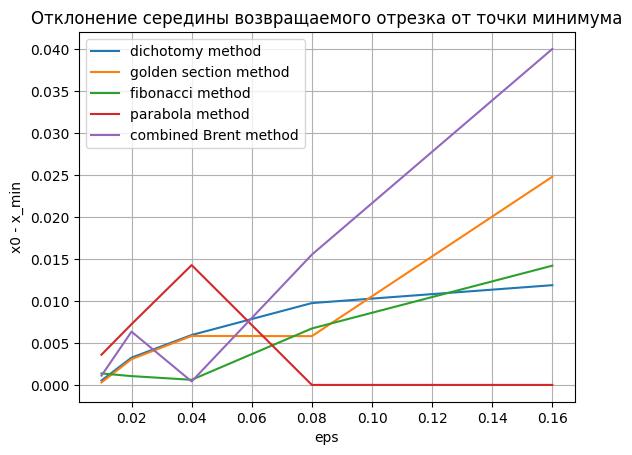

In [152]:
plt.plot(h, [np.abs(dichotomy_method(h[i], f_unimod)[0][3]) for i in ind], label="dichotomy method")
plt.plot(h, [np.abs(golden_section_method(h[i], f_unimod)[0][3]) for i in ind], label="golden section method")
plt.plot(h, [np.abs(fibonacci_method(h[i], f_unimod)[0][3]) for i in ind], label="fibonacci method")
plt.plot(h, [np.abs(parabola_method(h[i], f_unimod)[0][3]) for i in ind], label="parabola method")
plt.plot(h, [np.abs(combined_Brent_method(h[i], f_unimod)[0][3]) for i in ind], label="combined Brent method")
plt.xlabel("eps")
plt.ylabel("x0 - x_min")
plt.title("Отклонение середины возвращаемого отрезка от точки минимума")
plt.grid()
plt.legend()
plt.show()

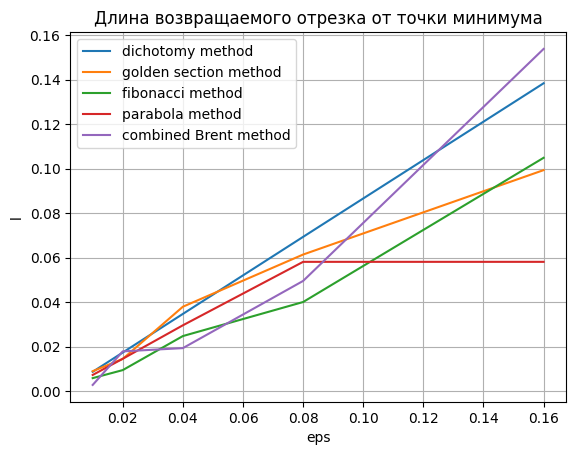

In [153]:
plt.plot(h, [dichotomy_method(h[i], f_unimod)[0][2] for i in ind], label="dichotomy method")
plt.plot(h, [golden_section_method(h[i], f_unimod)[0][2] for i in ind], label="golden section method")
plt.plot(h, [fibonacci_method(h[i], f_unimod)[0][2] for i in ind], label="fibonacci method")
plt.plot(h, [parabola_method(h[i], f_unimod)[0][2] for i in ind], label="parabola method")
plt.plot(h, [combined_Brent_method(h[i], f_unimod)[0][2] for i in ind], label="combined Brent method")
plt.xlabel("eps")
plt.ylabel("l")
plt.title("Длина возвращаемого отрезка от точки минимума")
plt.grid()
plt.legend()
plt.show()

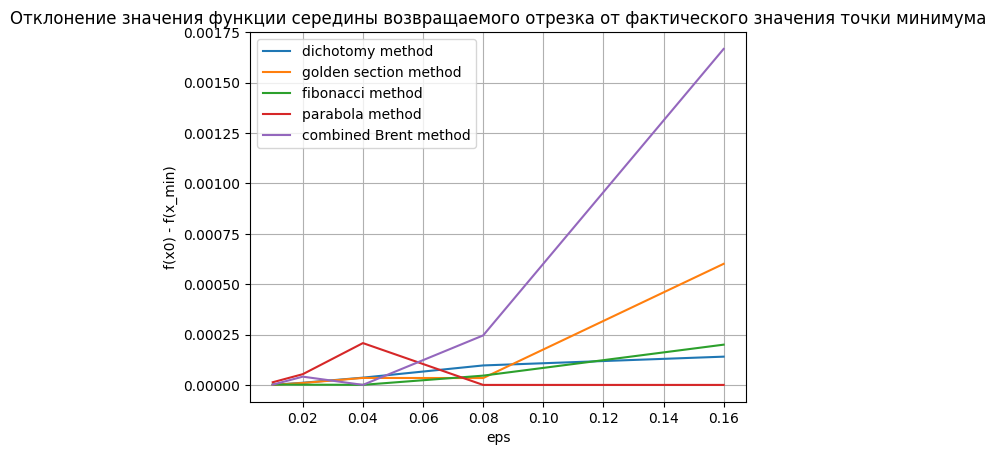

In [154]:
plt.plot(h, [dichotomy_method(h[i], f_unimod)[0][4] for i in ind], label="dichotomy method")
plt.plot(h, [golden_section_method(h[i], f_unimod)[0][4] for i in ind], label="golden section method")
plt.plot(h, [fibonacci_method(h[i], f_unimod)[0][4] for i in ind], label="fibonacci method")
plt.plot(h, [parabola_method(h[i], f_unimod)[0][4] for i in ind], label="parabola method")
plt.plot(h, [combined_Brent_method(h[i], f_unimod)[0][4] for i in ind], label="combined Brent method")
plt.xlabel("eps")
plt.ylabel("f(x0) - f(x_min)")
plt.title("Отклонение значения функции середины возвращаемого отрезка от фактического значения точки минимума")
plt.grid()
plt.legend()
plt.show()

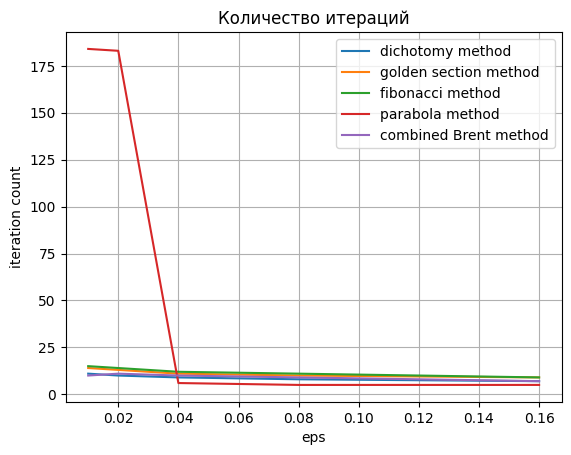

In [157]:
plt.plot(h, [dichotomy_method(h[i], f_unimod)[0][5] for i in ind], label="dichotomy method")
plt.plot(h, [golden_section_method(h[i], f_unimod)[0][5] for i in ind], label="golden section method")
plt.plot(h, [fibonacci_method(h[i], f_unimod)[0][5] for i in ind], label="fibonacci method")
plt.plot(h, [parabola_method(h[i], f_unimod)[0][5] for i in ind], label="parabola method")
plt.plot(h, [combined_Brent_method(h[i], f_unimod)[0][5] for i in ind], label="combined Brent method")
plt.xlabel("eps")
plt.ylabel("iteration count")
plt.title("Количество итераций")
plt.grid()
plt.legend()
plt.show()

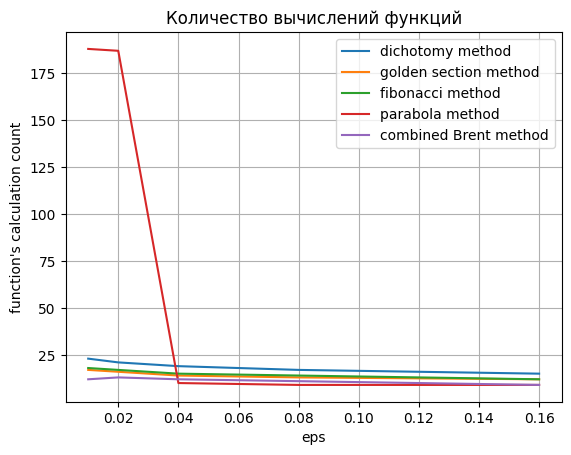

In [156]:
plt.plot(h, [dichotomy_method(h[i], f_unimod)[0][6] for i in ind], label="dichotomy method")
plt.plot(h, [golden_section_method(h[i], f_unimod)[0][6] for i in ind], label="golden section method")
plt.plot(h, [fibonacci_method(h[i], f_unimod)[0][6] for i in ind], label="fibonacci method")
plt.plot(h, [parabola_method(h[i], f_unimod)[0][6] for i in ind], label="parabola method")
plt.plot(h, [combined_Brent_method(h[i], f_unimod)[0][6] for i in ind], label="combined Brent method")
plt.xlabel("eps")
plt.ylabel("function's calculation count")
plt.title("Количество вычислений функций")
plt.grid()
plt.legend()
plt.show()

## Многомодальные функции

Протестируем реализованные функции на трёх мультимодальных функциях:
- $f1(x) = x^4 + x^3 - 20x^2 - 10x + 11$
- $f2(x) = 0.001x^4 -0.0166x^3 -0.084x^2 + 0.948x + 2$
- $f3(x) = 0.00001x^6 - 0.0042x^4 + 0.003x^3 + 0.374x^2 -0.452x -0.329$


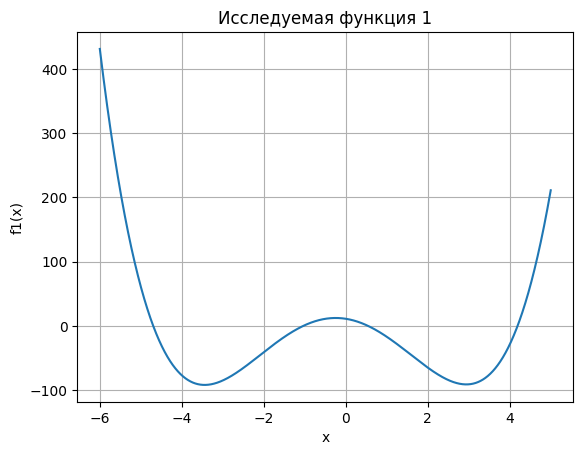

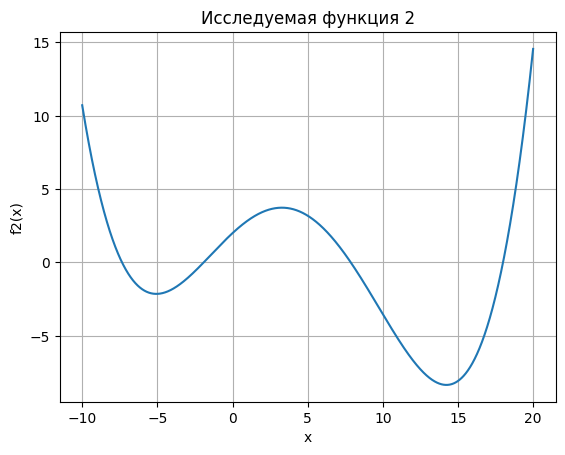

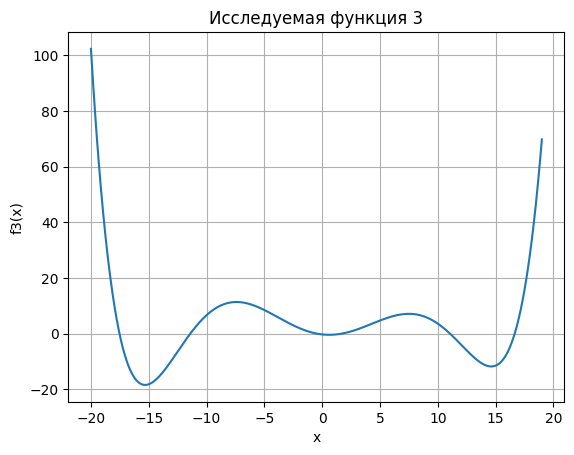

In [122]:
x1 = np.arange(-6, 5+0.0001, 0.0001)
function1 = x1**4 + x1**3 - 20*x1**2 - 10*x1 + 11
x2 = np.arange(-10, 20+0.0001, 0.0001)
function2 = 0.001*x2**4 -0.0166*x2**3 -0.084*x2**2 + 0.948*x2 + 2
x3 = np.arange(-20, 19+0.0001, 0.0001)
function3 = 0.00001*x3**6 - 0.0042*x3**4 + 0.003*x3**3 + 0.374*x3**2 -0.452*x3 -0.329

def f_1(x):
    return x**4 + x**3 - 20*x**2 - 10*x + 11

def f_2(x):
    return 0.001*x**4 -0.0166*x**3 -0.084*x**2 + 0.948*x + 2

def f_3(x):
    return 0.00001*x**6 - 0.0042*x**4 + 0.003*x**3 + 0.374*x**2 -0.452*x -0.329

plt.grid()
plt.plot(x1, function1)
plt.title("Исследуемая функция 1")
plt.xlabel("x")
plt.ylabel("f1(x)")
plt.show()

plt.grid()
plt.plot(x2, function2)
plt.title("Исследуемая функция 2")
plt.xlabel("x")
plt.ylabel("f2(x)")
plt.show()

plt.grid()
plt.plot(x3, function3)
plt.title("Исследуемая функция 3")
plt.xlabel("x")
plt.ylabel("f3(x)")
plt.show()

In [128]:
a = -6
b = 5
print(np.argmin(function1)/10000 - 6)
for h_ind in h:
    methods_table = PrettyTable([' ', 'a', 'b'])
    methods_table.add_row (['dichotomy method', dichotomy_method(h_ind, f_1)[0][0], dichotomy_method(h_ind, f_1)[0][1]])
    methods_table.add_row (['golden section method', golden_section_method(h_ind, f_1)[0][0], golden_section_method(h_ind, f_1)[0][1]])
    methods_table.add_row (['fibonacci method', fibonacci_method(h_ind, f_1)[0][0], fibonacci_method(h_ind, f_1)[0][1]])
    methods_table.add_row (['parabola method', parabola_method(h_ind, f_1)[0][0], parabola_method(h_ind, f_1)[0][1]])
    methods_table.add_row (['combined Brent method', combined_Brent_method(h_ind, f_1)[0][0], combined_Brent_method(h_ind, f_1)[0][1]])
    print(methods_table)

-3.4433
+-----------------------+--------------------+---------------------+
|                       |         a          |          b          |
+-----------------------+--------------------+---------------------+
|    dichotomy method   |    -3.48328125     | -3.3606249999999998 |
| golden section method | -3.547964039962987 |  -3.403252247502314 |
|    fibonacci method   | -3.497854077253236 | -3.4034334763948504 |
|    parabola method    | 2.940251456151277  |  2.940251483644531  |
| combined Brent method | -3.476692748027841 | -3.3640942193107652 |
+-----------------------+--------------------+---------------------+
+-----------------------+---------------------+---------------------+
|                       |          a          |          b          |
+-----------------------+---------------------+---------------------+
|    dichotomy method   |      -3.4740625     |     -3.41265625     |
| golden section method |  -3.45852723364937  |  -3.403252247502314 |
|    fibonacci method

In [129]:
a = -10
b = 20
print(np.argmin(function2)/10000 - 10)
for h_ind in h:
    methods_table = PrettyTable([' ', 'a', 'b'])
    methods_table.add_row (['dichotomy method', dichotomy_method(h_ind, f_2)[0][0], dichotomy_method(h_ind, f_2)[0][1]])
    methods_table.add_row (['golden section method', golden_section_method(h_ind, f_2)[0][0], golden_section_method(h_ind, f_2)[0][1]])
    methods_table.add_row (['fibonacci method', fibonacci_method(h_ind, f_2)[0][0], fibonacci_method(h_ind, f_2)[0][1]])
    methods_table.add_row (['parabola method', parabola_method(h_ind, f_2)[0][0], parabola_method(h_ind, f_2)[0][1]])
    methods_table.add_row (['combined Brent method', combined_Brent_method(h_ind, f_2)[0][0], combined_Brent_method(h_ind, f_2)[0][1]])
    print(methods_table)

14.231100000000001
+-----------------------+--------------------+--------------------+
|                       |         a          |         b          |
+-----------------------+--------------------+--------------------+
|    dichotomy method   | 14.134687500000002 |     14.273125      |
| golden section method | 14.195134850138801 | 14.345884812358047 |
|    fibonacci method   | 14.196721311475471 | 14.295081967213378 |
|    parabola method    | 14.231054111755865 | 14.231054452958688 |
| combined Brent method | -5.164961805306853 | -5.009318078247447 |
+-----------------------+--------------------+--------------------+
+-----------------------+--------------------+--------------------+
|                       |         a          |         b          |
+-----------------------+--------------------+--------------------+
|    dichotomy method   | 14.196210937500002 |    14.26546875     |
| golden section method | 14.195134850138801 | 14.252716211903792 |
|    fibonacci method   | 14.

In [130]:
a = -20
b = 19
print(np.argmin(function3)/10000 - 20)
for h_ind in h:
    methods_table = PrettyTable([' ', 'a', 'b'])
    methods_table.add_row (['dichotomy method', dichotomy_method(h_ind, f_3)[0][0], dichotomy_method(h_ind, f_3)[0][1]])
    methods_table.add_row (['golden section method', golden_section_method(h_ind, f_3)[0][0], golden_section_method(h_ind, f_3)[0][1]])
    methods_table.add_row (['fibonacci method', fibonacci_method(h_ind, f_3)[0][0], fibonacci_method(h_ind, f_3)[0][1]])
    methods_table.add_row (['parabola method', parabola_method(h_ind, f_3)[0][0], parabola_method(h_ind, f_3)[0][1]])
    methods_table.add_row (['combined Brent method', combined_Brent_method(h_ind, f_3)[0][0], combined_Brent_method(h_ind, f_3)[0][1]])
    print(methods_table)

-15.3148
+-----------------------+--------------------+--------------------+
|                       |         a          |         b          |
+-----------------------+--------------------+--------------------+
|    dichotomy method   |    14.51109375     | 14.667109374999999 |
| golden section method | 0.5404343447203558 | 0.6615535253108882 |
|    fibonacci method   | 0.5471124620062255 | 0.6261398176294168 |
|    parabola method    | 0.6048395512745934 | 0.6048395617908899 |
| combined Brent method | 0.5790491640350423 | 0.6768927236316238 |
+-----------------------+--------------------+--------------------+
+-----------------------+--------------------+--------------------+
|                       |         a          |         b          |
+-----------------------+--------------------+--------------------+
|    dichotomy method   |    14.584609375    |    14.66265625     |
| golden section method | 0.5866977550164026 | 0.6615535253108882 |
|    fibonacci method   | 0.58672510958